In [1]:
pip install torch torchvision


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models


In [3]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10  # You can adjust this as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization values for pretrained models
])


In [5]:
# Load datasets
from google.colab import drive
drive.mount('/content/drive')
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Train', transform=transform)
test_dataset = datasets.ImageFolder(root=r'/content/drive/MyDrive/Test', transform=transform)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Mounted at /content/drive


In [6]:
# Load a pre-trained model
model = models.resnet50(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)  # Number of unique celebrity classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the specified device
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 109MB/s]


In [7]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Try a lower learning rate
# Initialize the optimizer
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Using SGD with momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)



# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Decrease learning rate every 5 epochs




In [ ]:
# Initialize best validation loss for model checkpointing
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

        # Optional: Print training progress every 100 batches
        if (i + 1) % 100 == 0:
            print(f"Batch [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    # Validate the model at the end of each epoch
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(test_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Checkpoint the model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    # Update learning rate
    scheduler.step()


Epoch [1/10], Loss: 0.4353
Validation Loss: 1.9292, Accuracy: 57.06%
Epoch [2/10], Loss: 0.3962
Validation Loss: 1.9468, Accuracy: 53.03%
Epoch [3/10], Loss: 0.1527
Validation Loss: 1.5186, Accuracy: 61.96%
Epoch [4/10], Loss: 0.3519
Validation Loss: 1.7566, Accuracy: 59.08%
Epoch [5/10], Loss: 0.3727
Validation Loss: 1.8158, Accuracy: 60.23%
Epoch [6/10], Loss: 0.1294
Validation Loss: 0.8283, Accuracy: 75.50%
Epoch [7/10], Loss: 0.0420
Validation Loss: 0.8182, Accuracy: 76.08%
Epoch [8/10], Loss: 0.0280
Validation Loss: 0.8198, Accuracy: 75.79%
Epoch [9/10], Loss: 0.0171
Validation Loss: 0.8052, Accuracy: 74.64%
Epoch [10/10], Loss: 0.0235
Validation Loss: 0.8092, Accuracy: 75.22%


In [9]:
# Initialize best validation loss for model checkpointing
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

        # Optional: Print training progress every 100 batches
        if (i + 1) % 100 == 0:
            print(f"Batch [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    # Validate the model at the end of each epoch
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(test_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Checkpoint the model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    # Update learning rate
    scheduler.step()


Epoch [1/10], Loss: 0.8722
Validation Loss: 1.5539, Accuracy: 55.04%
Epoch [2/10], Loss: 0.4115
Validation Loss: 1.0478, Accuracy: 65.71%
Epoch [3/10], Loss: 0.1837
Validation Loss: 1.3196, Accuracy: 68.59%
Epoch [4/10], Loss: 0.1674
Validation Loss: 1.4253, Accuracy: 66.86%
Epoch [5/10], Loss: 0.0611
Validation Loss: 0.6597, Accuracy: 80.69%
Epoch [6/10], Loss: 0.0157
Validation Loss: 0.6109, Accuracy: 79.83%
Epoch [7/10], Loss: 0.0108
Validation Loss: 0.6151, Accuracy: 79.54%
Epoch [8/10], Loss: 0.0100
Validation Loss: 0.5893, Accuracy: 80.69%
Epoch [9/10], Loss: 0.0113
Validation Loss: 0.5947, Accuracy: 82.13%
Epoch [10/10], Loss: 0.0062
Validation Loss: 0.5873, Accuracy: 80.98%


In [10]:
# To load the model later
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode


<ipython-input-10-064669419721>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.86      0.67      0.75        18
           2       0.80      0.80      0.80        20
           3       0.78      0.90      0.84        20
           4       0.94      0.75      0.83        20
           5       0.94      0.79      0.86        19
           6       0.71      0.60      0.65        20
           7       0.80      0.80      0.80        20
           8       0.95      0.95      0.95        19
           9       0.65      0.68      0.67        19
          10       0.70      0.84      0.76        19
          11       0.83      0.75      0.79        20
          12       0.94      0.84      0.89        19
          13       0.78      0.84      0.81        37
          14       0.81      0.89      0.85        19
          15       0.86      0.95      0.90        19
          16       0.86      0.90      0.88        20

    accuracy              

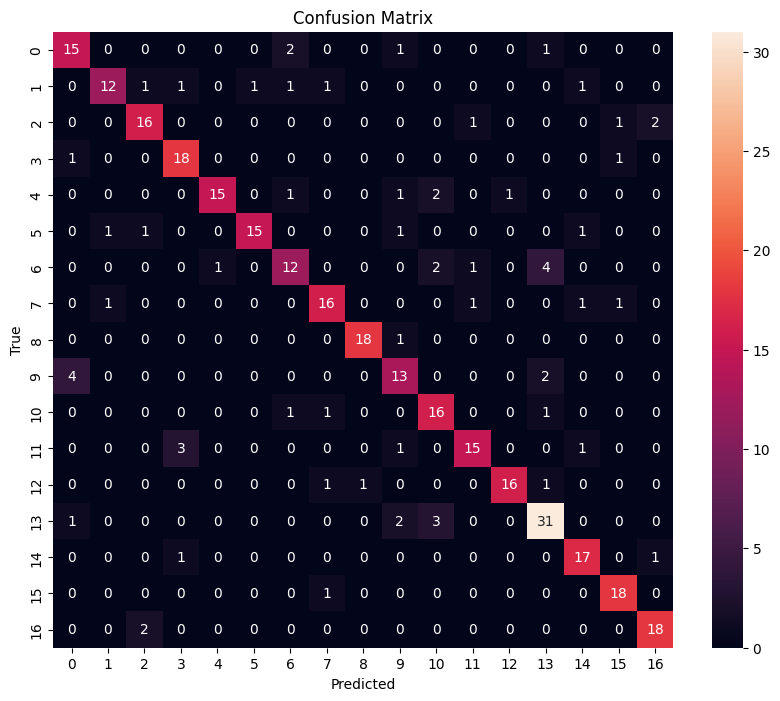

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
import torch
from torchvision import transforms
from PIL import Image


In [13]:
# Load a pre-trained model
model = models.resnet50(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)  # Number of unique celebrity classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the specified device
#model = model.to(device)

model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-13-ca19110d0559>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
#import torch
#from torchvision import transforms
#from PIL import Image

# Check if GPU is available and set the device



#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your model and move it to the correct device
#model = models.resnet18(num_classes=len(train_dataset.classes))  # Adjust if using a different architecture
#model.load_state_dict(torch.load('best_model.pth'))
#model.to(device)  # Move model to GPU or CPU
#model.eval()  # Set the model to evaluation mode

# Define the transformations
import torch
from torchvision import transforms
from PIL import Image

def load_image(image_path, device=None):
    try:
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        image = transform(image)

        # Add batch dimension if the model expects a batch
        if device is not None and torch.cuda.is_available():
            image = image.unsqueeze(0).to(device)

        return image

    except Exception as e:
        print(f"Error loading image: {e}")
        return None  # Or return a default value

def predict(image_path, model, device=None):
    image = load_image(image_path, device)
    if image is None:
        return None  # Handle loading errors

    # Move image to the same device as the model
    if device is not None and not next(model.parameters()).is_cuda:
        model.to(device)
    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)

    predicted_class_index = predicted.item()
    try:
        predicted_class_name = train_dataset.classes[predicted_class_index]
    except IndexError:
        print(f"Invalid class index: {predicted_class_index}")
        return None  # Or return a default value

    return predicted_class_name

# Example usage
image_path = '/content/jdp.jpg'  # Replace with your image path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Explicitly set device
predicted_class_name = predict(image_path, model, device)

if predicted_class_name:
    print(f'Predicted celebrity: {predicted_class_name}')
else:
    print("Error predicting class")

Predicted celebrity: Johnny Depp
